In [7]:
# Histogram equalization

# https://jstar0525.tistory.com/7

# 누적합 구하고 min으로 펴준다.

In [11]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

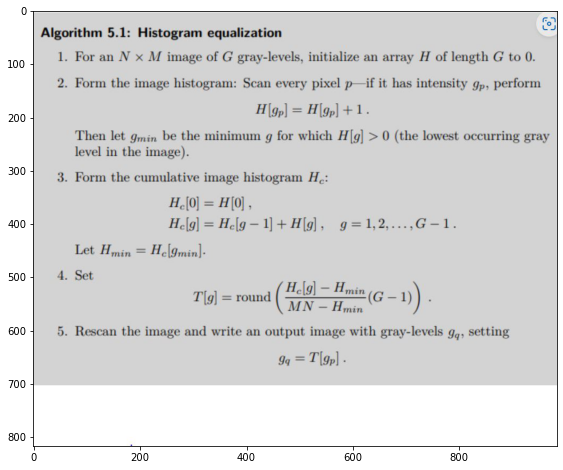

In [34]:
hist_equal = Image.open('./histequal.JPG')
plt.figure(figsize=(10,8))
plt.imshow(hist_equal)
plt.show()

In [51]:
hist_equal1 = cv2.imread('./histequal.JPG')

cv2.imshow('hist_equal1', hist_equal1)
cv2.waitKey(0)
cv2.destroyAllWindows()

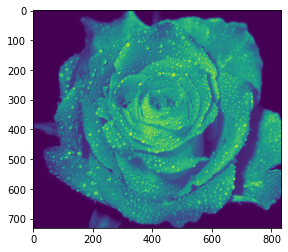

In [73]:
img1 = cv2.imread('./rose.JPG', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()

In [79]:
def histogram_equalization(img):
    
    (N, M) = img.shape
    G = 256 # gray Levels
    H = np.zeros(G) # initialize an array Histogram
    
    for g in img.ravel():
        H[g] += 1
    g_min = np.min(np.nonzero(H))
    
    
    H_c = np.zeros_like(H) # cumulative image histogram
    H_c[0] = H[0]
    for g in range(1, G):
        H_c[g] = H_c[g-1] + H[g]
    H_min = H_c[g_min]
    
    
    T = np.round( (H_c - H_min) / (M*N - H_min) * (G-1) )
    
    result = np.zeros_like(img)
    for n in range(N):
        for m in range(M):
            result[n, m] = T[img[n, m]]
    
    return result, T

In [81]:
result, T = histogram_equalization(img1)

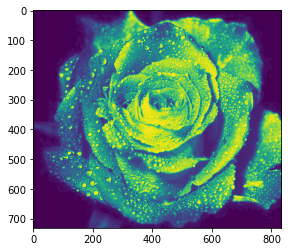

In [82]:
plt.imshow(result)
plt.show()